<a href="https://colab.research.google.com/github/w8mr/ing-ml-challenge/blob/master/ING_ML_Challenge_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ING Machine learning challenge week 6 Income data

## Setup kaggle, token and datasets

Upgrade Kaggle

In [1]:
!pip install kaggle --upgrade
!kaggle --version

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Kaggle API 1.5.4


Upload kaggle token


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


Download and unzip the dataset

In [3]:
!kaggle competitions download -c ml-challenge-week6
!unzip -o census-income.data.zip
!unzip -o census-income.test.zip

census-income.data.zip: Skipping, found more recently modified local copy (use --force to force download)
census-income.test.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
census-income.names: Skipping, found more recently modified local copy (use --force to force download)
Archive:  census-income.data.zip
  inflating: census-income.data      
Archive:  census-income.test.zip
  inflating: census-income.test      


In [4]:
import pandas as pd 
import numpy as np


# Column names found at https://www2.1010data.com/documentationcenter/beta/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html manually adjusted
features = {
    'age': 'continuous', 
    'worker_class': 'categorical', 
    'industry_code': 'categorical', 
    'occupation_code': 'categorical', 
    'education': 'categorical', 
    'hourly_wage': 'continuous', 
    'enrolled_education': 'categorical', 
    'marital_status': 'categorical', 
    'major_industry_code': 'categorical', 
    'major_occupation_code': 'categorical', 
    'mace': 'categorical', 
    'hispanic_rigin': 'categorical', 
    'sex': 'categorical', 
    'union': 'categorical', 
    'unemployment_reason': 'categorical', 
    'employment_status': 'categorical', 
    'capital_gains': 'continuous', 
    'capital_losses': 'continuous', 
    'divdends': 'continuous', 
    'tax_filer_status': 'categorical', 
    'previous_residence_region': 'categorical', 
    'previous_residence_state': 'categorical', 
    'household_family_status': 'categorical', 
    'household_summary_household': 'categorical', 
    'instance_weight': 'continuous', 
    'migration_code_change_msa': 'categorical', 
    'migration_code_change_reg': 'categorical', 
    'migration_code_move_reg': 'categorical', 
    'live_this_house_last_year': 'categorical', 
    'previous_sunbelt': 'categorical', 
    'persons_worked_employer': 'continuous', 
    'family_members_under_18': 'categorical', 
    'birth_country_father': 'categorical',
    'birth_country_mother': 'categorical', 
    'birth_country_self': 'categorical', 
    'citizenship': 'categorical', 
    'total_person_income': 'continuous', 
    'own_business_self_employed': 'categorical', 
    'veterans_benefits': 'continuous', 
    'weeks_worked': 'continuous', 
    'year': 'categorical', 
    'income': 'categorical'
}

target='income'

def categorical(features): 
  return  [key for (key, value) in features.items() if value == 'categorical']

def continuous(features): 
  return  [key for (key, value) in features.items() if value == 'continuous']

na_values = ['Not in universe', 'Not in universe or children', 'Not in universe under 1 year old', '?']

train_df = pd.read_csv('census-income.data', sep=', ', header=None, names=features.keys(), na_values=na_values)

del features[target]

train_df.info()
train_df.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                            199523 non-null int64
worker_class                   99278 non-null object
industry_code                  199523 non-null int64
occupation_code                199523 non-null int64
education                      199523 non-null object
hourly_wage                    199523 non-null int64
enrolled_education             12580 non-null object
marital_status                 199523 non-null object
major_industry_code            98839 non-null object
major_occupation_code          98839 non-null object
mace                           199523 non-null object
hispanic_rigin                 198649 non-null object
sex                            199523 non-null object
union                          19064 non-null object
unemployment_reason            6070 non-null object
employment_status              199523 non-null object
capital_gains                  19952

,age,worker_class,industry_code,occupation_code,education,hourly_wage,enrolled_education,marital_status,major_industry_code,major_occupation_code,mace,hispanic_rigin,sex,union,unemployment_reason,employment_status,capital_gains,capital_losses,divdends,tax_filer_status,previous_residence_region,previous_residence_state,household_family_status,household_summary_household,instance_weight,migration_code_change_msa,migration_code_change_reg,migration_code_move_reg,live_this_house_last_year,previous_sunbelt,persons_worked_employer,family_members_under_18,birth_country_father,birth_country_mother,birth_country_self,citizenship,total_person_income,own_business_self_employed,veterans_benefits,weeks_worked,year,income
0,73,NaN,0,0,High school graduate,0,NaN,Widowed,NaN,NaN,White,All other,Female,NaN,NaN,Not in labor force,0,0,0,Nonfiler,NaN,NaN,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,NaN,NaN,0,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,NaN,Divorced,Construction,Precision production craft & repair,White,All other,Male,NaN,NaN,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,- 50000.
2,18,NaN,0,0,10th grade,0,High school,Never married,NaN,NaN,Asian or Pacific Islander,All other,Female,NaN,NaN,Not in labor force,0,0,0,Nonfiler,NaN,NaN,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,NaN,NaN,0,NaN,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,- 50000.
3,9,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
4,10,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.


In [5]:
submit_df = pd.read_csv('census-income.test', sep=',', header=None, names=features.keys())
submit_df.info()
submit_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 41 columns):
age                            99762 non-null int64
worker_class                   99762 non-null object
industry_code                  99762 non-null int64
occupation_code                99762 non-null int64
education                      99762 non-null object
hourly_wage                    99762 non-null int64
enrolled_education             99762 non-null object
marital_status                 99762 non-null object
major_industry_code            99762 non-null object
major_occupation_code          99762 non-null object
mace                           99762 non-null object
hispanic_rigin                 99357 non-null object
sex                            99762 non-null object
union                          99762 non-null object
unemployment_reason            99762 non-null object
employment_status              99762 non-null object
capital_gains                  99762 non-null i

,age,worker_class,industry_code,occupation_code,education,hourly_wage,enrolled_education,marital_status,major_industry_code,major_occupation_code,mace,hispanic_rigin,sex,union,unemployment_reason,employment_status,capital_gains,capital_losses,divdends,tax_filer_status,previous_residence_region,previous_residence_state,household_family_status,household_summary_household,instance_weight,migration_code_change_msa,migration_code_change_reg,migration_code_move_reg,live_this_house_last_year,previous_sunbelt,persons_worked_employer,family_members_under_18,birth_country_father,birth_country_mother,birth_country_self,citizenship,total_person_income,own_business_self_employed,veterans_benefits,weeks_worked,year
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95


## Create features


In [0]:
def add_feature_industry_occupation(df):
  smallest_group = 500
  counts = (df
            .groupby(by=['industry_code','occupation_code'])
            .size().reset_index(name='counts')
            .apply(lambda x: (x[0]*100+x[1], x[0]*100+x[1] if x[2] > smallest_group else x[0]*100), axis=1, raw=True))
  counts_dict = {tup[0]: tup[1] for tup in counts} 
  df['industry_occupation'] = (df['industry_code']*100+df['occupation_code']).apply(lambda x: counts_dict[x])

add_feature_industry_occupation(train_df)
add_feature_industry_occupation(submit_df)
features['industry_occupation']='categorical'



## Inspect data


In [34]:
for column in categorical(features):
    counts = train_df[column].value_counts()
    print("{}: \n{}\n".format(column,counts ))


worker_class: 
Private                           72028
Self-employed-not incorporated     8445
Local government                   7784
State government                   4227
Self-employed-incorporated         3265
Federal government                 2925
Never worked                        439
Without pay                         165
Name: worker_class, dtype: int64

industry_code: 
0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28  

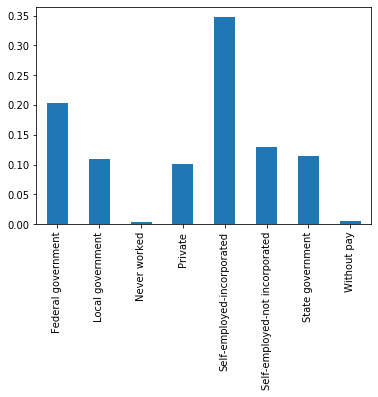

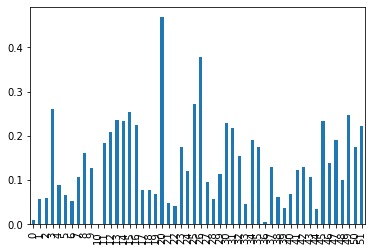

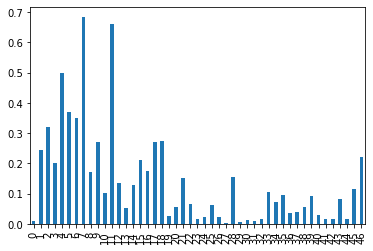

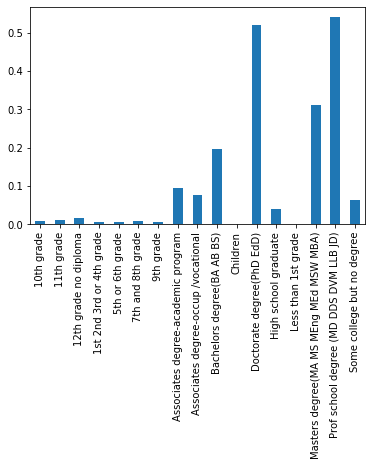

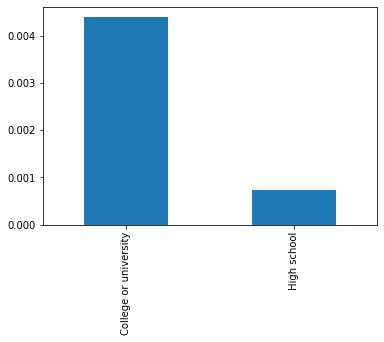

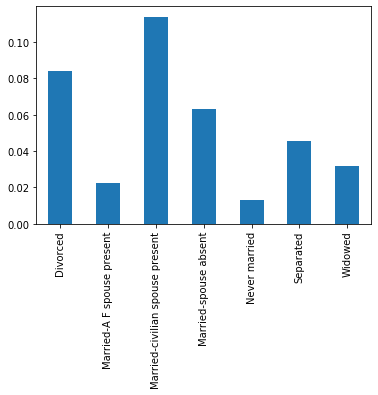

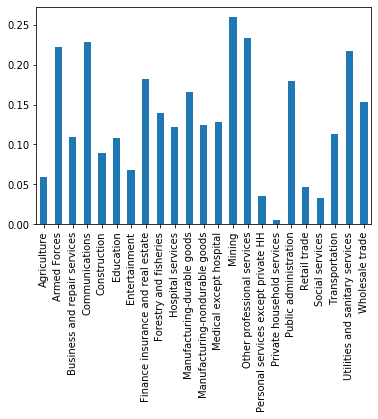

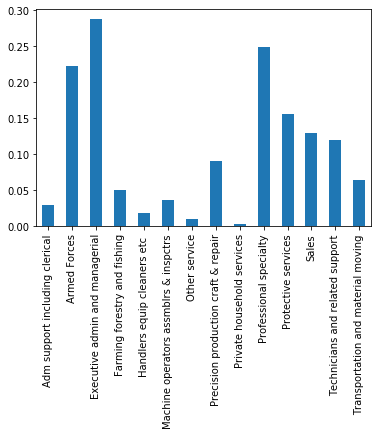

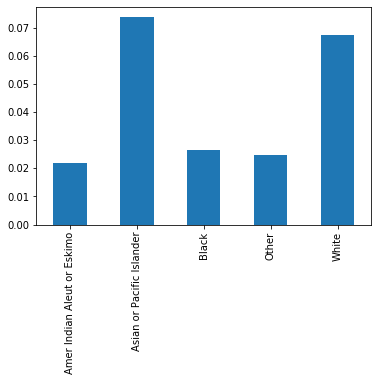

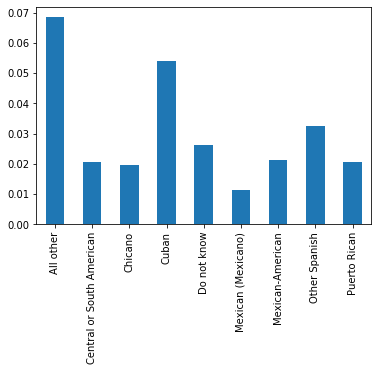

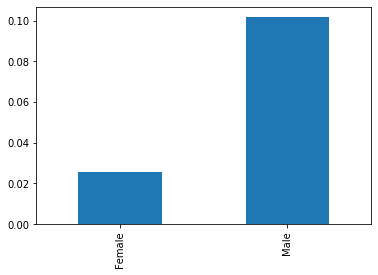

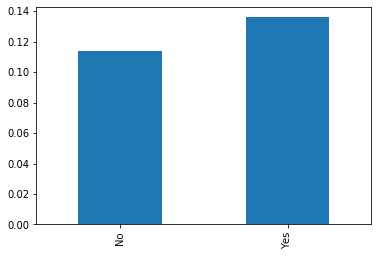

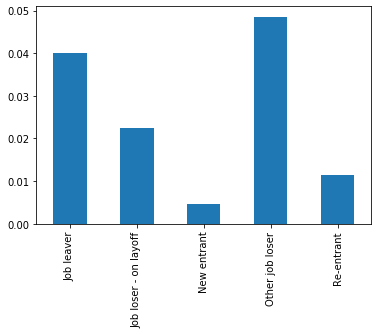

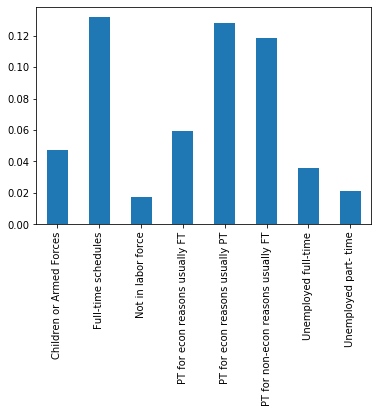

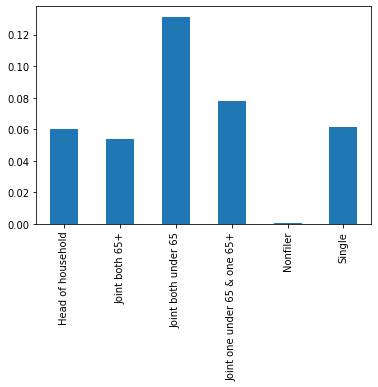

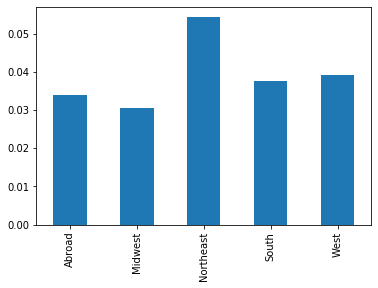

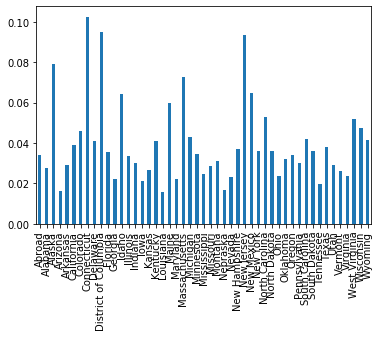

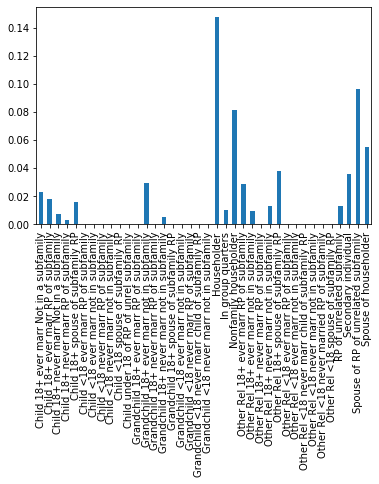

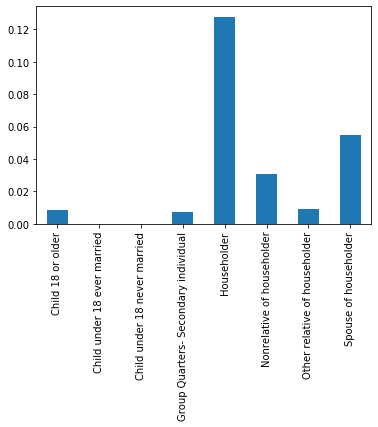

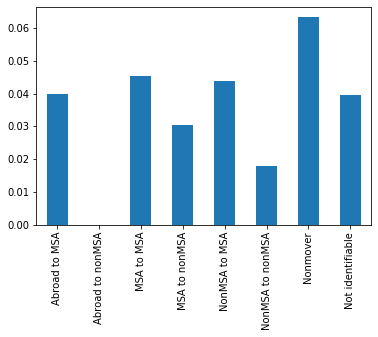

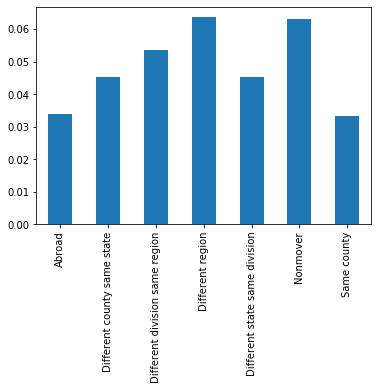

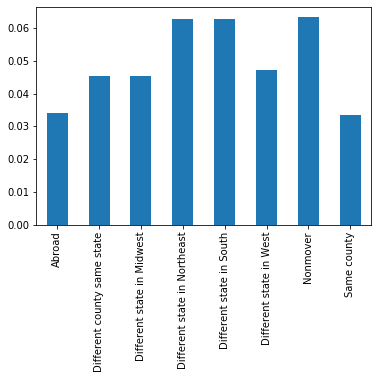

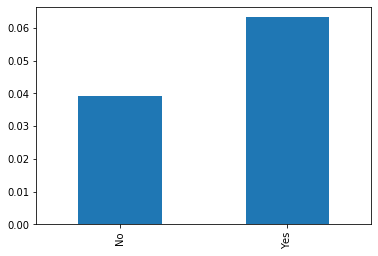

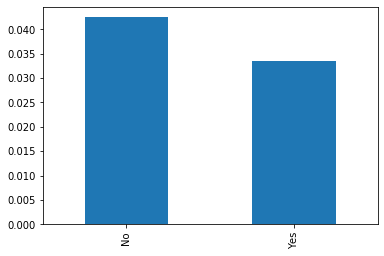

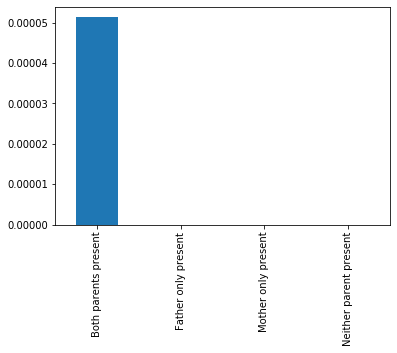

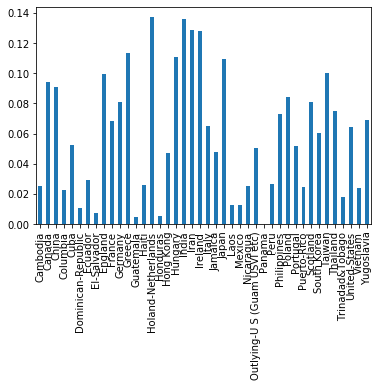

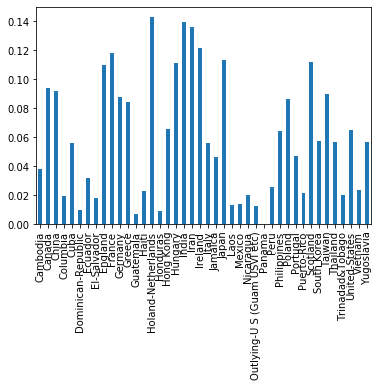

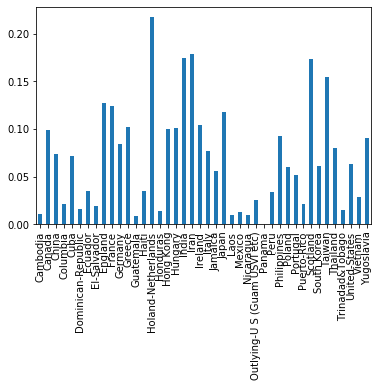

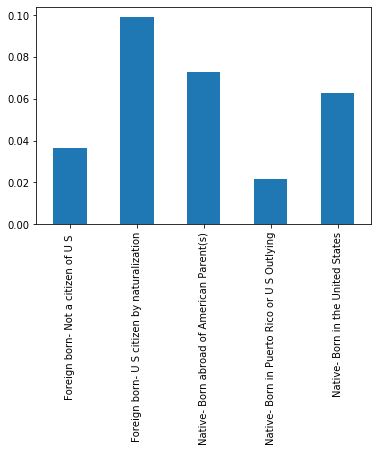

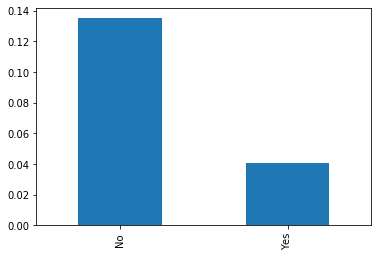

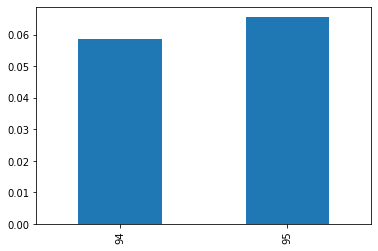

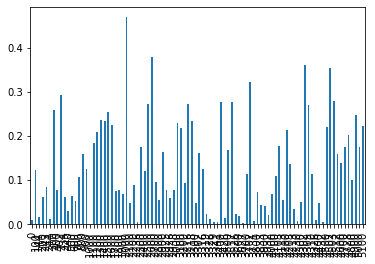

KeyboardInterrupt: ignored

In [36]:
import matplotlib.pyplot as plt
import math

def part_above_50k_dict(column):
  return {tup[0]: tup[1][tup[1]=='50000+.'].count()/tup[1].count() for tup in train_df.groupby(by=[column])[target]}

def part_above_50k_series(column):
  return pd.Series(part_above_50k_dict(column))

def part_above_50k(column):
  dict = part_above_50k_dict(column)
  return train_df[column].apply(lambda x: 0.5 if pd.isnull(x) else dict[x])

def plot_percentage_above_50k(column):
  above50k = part_above_50k_series(column)
  above50k.plot.bar()
  plt.show()


for feature in categorical(features):
  plot_percentage_above_50k(feature)

def f50k(feature):
  return '{}_'.format(feature)

def add_part_above_50k(df):
  for feature in features:
    df[f50k(feature)] = part_above_50k(feature)

add_part_above_50k(train_df)
add_part_above_50k(submit_df)


train_df.head()


In [8]:
def X(df):
  return pd.get_dummies(df[features],columns=categorical(features))

def y(df):
  return df[target]

X_full = X(train_df)
y_full = y(train_df)

X_full.info()
X_full.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Columns: 575 entries, age to industry_occupation_5100
dtypes: float64(1), int64(9), uint8(565)
memory usage: 122.7 MB


,age,hourly_wage,capital_gains,capital_losses,divdends,instance_weight,persons_worked_employer,total_person_income,veterans_benefits,weeks_worked,worker_class_Federal government,worker_class_Local government,worker_class_Never worked,worker_class_Private,worker_class_Self-employed-incorporated,worker_class_Self-employed-not incorporated,worker_class_State government,worker_class_Without pay,industry_code_0,industry_code_1,industry_code_2,industry_code_3,industry_code_4,industry_code_5,industry_code_6,industry_code_7,industry_code_8,industry_code_9,industry_code_10,industry_code_11,industry_code_12,industry_code_13,industry_code_14,industry_code_15,industry_code_16,industry_code_17,industry_code_18,industry_code_19,industry_code_20,industry_code_21,...,industry_occupation_3400,industry_occupation_3426,industry_occupation_3500,industry_occupation_3517,industry_occupation_3526,industry_occupation_3600,industry_occupation_3627,industry_occupation_3700,industry_occupation_3702,industry_occupation_3731,industry_occupation_3800,industry_occupation_3833,industry_occupation_3900,industry_occupation_3932,industry_occupation_4000,industry_occupation_4100,industry_occupation_4108,industry_occupation_4113,industry_occupation_4200,industry_occupation_4208,industry_occupation_4213,industry_occupation_4230,industry_occupation_4300,industry_occupation_4302,industry_occupation_4309,industry_occupation_4310,industry_occupation_4326,industry_occupation_4400,industry_occupation_4432,industry_occupation_4500,industry_occupation_4502,industry_occupation_4503,industry_occupation_4512,industry_occupation_4600,industry_occupation_4700,industry_occupation_4728,industry_occupation_4800,industry_occupation_4900,industry_occupation_5000,industry_occupation_5100
0,73,0,0,0,0,1700.09,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58,0,0,0,0,1053.55,1,0,2,52,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18,0,0,0,0,991.95,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,1758.14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,1069.16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Split into training and test set and stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.2, random_state=42, stratify=y_full)

In [10]:
y_test.value_counts()

- 50000.    37429
50000+.      2476
Name: income, dtype: int64

Random Forest Classification

In [0]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=800, max_depth=15, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [159]:
len(predictions[predictions=='50000+.'])

0

In [13]:
len(predictions)

39905

In [0]:
q = X_test.copy()
q['income'] = y_test
q['predict_rfc'] = predictions

q.head()

diff = q[q['income']!=q['predict_rfc']]


In [161]:
'percentage: {}, fn: {}, fp {}'.format(len(diff)/len(q), len(diff[diff['income']=='50000+.'])/len(diff), len(diff[diff['income']!='50000+.'])/len(diff))

'percentage: 0.06204736248590402, fn: 1.0, fp 0.0'

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
predictions_knn = knn.predict(X_test)

In [58]:
len(predictions_knn[predictions_knn=='50000+.'])

1349

In [22]:
len(X_test)

39905

In [59]:
q = X_test.copy()
q['income'] = y_test
q['predict_knn'] = predictions_knn

q.head()

diff = q[q['income']!=q['predict_knn']]

diff.head(50)

,industry_occupation_,mace_,education_,citizenship_,country of birth self_,age,income,predict_knn
168021,0.044199,0.067350,0.038817,0.062992,0.062993,34,50000+.,- 50000.
7178,0.008998,0.067350,0.038817,0.062992,0.062993,46,50000+.,- 50000.
37972,0.137931,0.067350,0.064234,0.062992,0.062993,45,50000+.,- 50000.
172349,0.008998,0.067350,0.197080,0.062992,0.062993,44,50000+.,- 50000.
147012,0.008998,0.067350,0.038817,0.062992,0.062993,38,50000+.,- 50000.
170681,0.322034,0.067350,0.311573,0.062992,0.062993,54,50000+.,- 50000.
113300,0.008998,0.067350,0.064234,0.062992,0.062993,84,50000+.,- 50000.
121987,0.021127,0.067350,0.038817,0.062992,0.062993,47,50000+.,- 50000.
87409,0.113652,0.067350,0.311573,0.062992,0.062993,54,- 50000.,50000+.
111099,0.035185,0.073693,0.038817,0.099061,0.092308,64,50000+.,- 50000.


In [61]:
'percentage: {}, fn: {}, fp {}'.format(len(diff)/len(q), len(diff[diff['income']=='50000+.'])/len(diff), len(diff[diff['income']!='50000+.'])/len(diff))

'percentage: 0.05891492294198722, fn: 0.7396852403232667, fp 0.2603147596767333'

In [0]:
t=X_test['industry_occupation_']*X_test['mace_']*X_test['education_']*X_test['citizenship_']*X_test['country of birth self_']*X_test['age_']

In [90]:
type(t)
t[t>=0.000001]

151536    0.000005
170681    0.000004
155079    0.000006
6090      0.000002
122947    0.000002
            ...   
29264     0.000003
52250     0.000013
129203    0.000003
139091    0.000001
21967     0.000002
Length: 2733, dtype: float64

In [139]:
q = X_test.copy()
q['income'] = y_test
q['product'] = t
q['predict'] = q['product'].apply(lambda x: '- 50000.' if x<0.000001 else '50000+.')
q.head(50)

diff = q[q['income']!=q['predict']]

diff.head(50)

'percentage: {}, fn: {}, fp {}'.format(len(diff)/len(q), len(diff[diff['income']=='50000+.'])/len(diff), len(diff[diff['income']!='50000+.'])/len(diff))

,industry_occupation_,mace_,education_,citizenship_,country of birth self_,age_,age,income,product,predict
168021,0.044199,0.067350,0.038817,0.062992,0.062993,0.088564,34,50000+.,4.060652e-08,- 50000.
7178,0.008998,0.067350,0.038817,0.062992,0.062993,0.169744,46,50000+.,1.584491e-08,- 50000.
37972,0.137931,0.067350,0.064234,0.062992,0.062993,0.153846,45,50000+.,3.642708e-07,- 50000.
172349,0.008998,0.067350,0.197080,0.062992,0.062993,0.144293,44,50000+.,6.838552e-08,- 50000.
147012,0.008998,0.067350,0.038817,0.062992,0.062993,0.116875,38,50000+.,1.090980e-08,- 50000.
122947,0.234417,0.067350,0.197080,0.062992,0.062993,0.153757,55,- 50000.,1.898352e-06,50000+.
183827,0.409091,0.067350,0.064234,0.062992,0.062993,0.169744,46,- 50000.,1.192040e-06,50000+.
121391,0.486486,0.067350,0.197080,0.062992,0.062993,0.048852,29,- 50000.,1.251724e-06,50000+.
113300,0.008998,0.067350,0.064234,0.062992,0.062993,0.013487,84,50000+.,2.083407e-09,- 50000.
121987,0.021127,0.067350,0.038817,0.062992,0.062993,0.171020,47,50000+.,3.748054e-08,- 50000.


In [0]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import f1_score

model = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=500)
model.fit(X_train,y_train)

predictions = model.predict(X_test)


In [31]:
q = X_test.copy()
q['income'] = y_test
q['predict'] = predictions
q.head(50)

diff = q[q['income']!=q['predict']]

diff.head(50)

'percentage: {}, fn: {}, fp {}'.format(len(diff)/len(q), len(diff[diff['income']=='50000+.'])/len(diff), len(diff[diff['income']!='50000+.'])/len(diff))

'percentage: 0.04683623606064403, fn: 0.8095238095238095, fp 0.19047619047619047'

In [13]:
q.head(50)

,age,hourly_wage,capital_gains,capital_losses,divdends,instance_weight,persons_worked_employer,total_person_income,veterans_benefits,weeks_worked,worker_class_Federal government,worker_class_Local government,worker_class_Never worked,worker_class_Private,worker_class_Self-employed-incorporated,worker_class_Self-employed-not incorporated,worker_class_State government,worker_class_Without pay,industry_code_0,industry_code_1,industry_code_2,industry_code_3,industry_code_4,industry_code_5,industry_code_6,industry_code_7,industry_code_8,industry_code_9,industry_code_10,industry_code_11,industry_code_12,industry_code_13,industry_code_14,industry_code_15,industry_code_16,industry_code_17,industry_code_18,industry_code_19,industry_code_20,industry_code_21,...,industry_occupation_3500,industry_occupation_3517,industry_occupation_3526,industry_occupation_3600,industry_occupation_3627,industry_occupation_3700,industry_occupation_3702,industry_occupation_3731,industry_occupation_3800,industry_occupation_3833,industry_occupation_3900,industry_occupation_3932,industry_occupation_4000,industry_occupation_4100,industry_occupation_4108,industry_occupation_4113,industry_occupation_4200,industry_occupation_4208,industry_occupation_4213,industry_occupation_4230,industry_occupation_4300,industry_occupation_4302,industry_occupation_4309,industry_occupation_4310,industry_occupation_4326,industry_occupation_4400,industry_occupation_4432,industry_occupation_4500,industry_occupation_4502,industry_occupation_4503,industry_occupation_4512,industry_occupation_4600,industry_occupation_4700,industry_occupation_4728,industry_occupation_4800,industry_occupation_4900,industry_occupation_5000,industry_occupation_5100,income,predict
96828,9,0,0,0,0,276.38,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
29328,54,0,3411,0,0,1397.43,6,0,2,52,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
30351,18,0,0,0,0,2494.91,1,0,2,52,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
152474,28,0,0,0,1500,1537.66,1,0,2,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
143717,39,0,0,0,0,1032.38,6,0,2,52,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,- 50000.,- 50000.
77432,42,0,0,0,0,1613.15,1,0,2,46,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
164552,27,1272,0,0,0,2719.90,4,0,2,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
116612,45,0,0,0,80,2678.29,6,0,2,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
113030,49,0,0,0,0,1995.83,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,- 50000.,- 50000.
168021,34,0,0,0,0,1708.47,1,0,2,52,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50000+.,- 50000.


In [32]:
X_submit = X(submit_df)

# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_submit.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_submit[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_submit = X_submit[X_train.columns]

predictions = model.predict(X_submit)

output = pd.DataFrame({'index': range(0, len(predictions)),'income class': predictions})
output['income class'] = output['income class'].apply(lambda x: 1 if x == '50000+.' else 0)
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
files.download('my_submission.csv') 

Your submission was successfully saved!


## Making a submission

In [0]:
import numpy as np

submission_df = pd.read_csv('sampleSubmission.csv')
submission_df['income class'] = np.random.randint(0, 2, submission_df.shape[0])
submission_df['income class'].head()

In [0]:
submission_df.to_csv('submission.csv')

```
usage: kaggle competitions submit [-h] -f FILE_NAME -m MESSAGE [-q]
                                  [competition]

required arguments:
  -f FILE_NAME, --file FILE_NAME
                        File for upload (full path)
  -m MESSAGE, --message MESSAGE
                        Message describing this submission

optional arguments:
  -h, --help            show this help message and exit
  competition           Competition URL suffix (use "kaggle competitions list" to show options)
                        If empty, the default competition will be used (use "kaggle config set competition")"
  -q, --quiet           Suppress printing information about the upload/download progress
```

In [0]:
!kaggle competitions submit -c ml-challenge-week6 -f submission.csv -m "Test"

## List competition submissions

```
usage: kaggle competitions submissions [-h] [-v] [-q] [competition]

optional arguments:
  -h, --help   show this help message and exit
  competition  Competition URL suffix (use "kaggle competitions list" to show options)
               If empty, the default competition will be used (use "kaggle config set competition")"
  -v, --csv    Print results in CSV format (if not set print in table format)
  -q, --quiet  Suppress printing information about the upload/download progress
```

In [0]:
!kaggle competitions submissions ml-challenge-week6

## Get competition leaderboard

```
usage: kaggle competitions leaderboard [-h] [-s] [-d] [-p PATH] [-v] [-q]
                                       [competition]

optional arguments:
  -h, --help            show this help message and exit
  competition           Competition URL suffix (use "kaggle competitions list" to show options)
                        If empty, the default competition will be used (use "kaggle config set competition")"
  -s, --show            Show the top of the leaderboard
  -d, --download        Download entire leaderboard
  -p PATH, --path PATH  Folder where file(s) will be downloaded, defaults to current working directory
  -v, --csv             Print results in CSV format (if not set print in table format)
  -q, --quiet           Suppress printing information about the upload/download progress
```

In [0]:
!kaggle competitions leaderboard ml-challenge-week6 -s

 teamId  teamName                    submissionDate       score    
-------  --------------------------  -------------------  -------  
4467419  God mode (or cheating)      2020-02-28 14:32:13  1.00000  
4467274  ML Challenge Solution       2020-02-28 12:56:08  0.85963  
4448485  ML Challenge Benchmark      2020-02-25 07:14:07  0.72384  
4467459  Random guessing (be above)  2020-02-28 14:39:17  0.50006  


## Uploading a Colab notebook to Kaggle Kernels

### Downloading a notebook from Colab

To download from Colab, use **File** | **Download .ipynb**

### Then upload the notebook to your Colab runtime

In [0]:
uploaded = files.upload()
notebook_path = list(uploaded.keys())[0]

In [0]:
!mkdir -p export
!mv "$notebook_path" export/

### Initialize metadata file for a kernel

```
usage: kaggle kernels init [-h] [-p FOLDER]

optional arguments:
  -h, --help            show this help message and exit
  -p FOLDER, --path FOLDER
                        Folder for upload, containing data files and a special kernel-metadata.json file       
                        (https://github.com/Kaggle/kaggle-api/wiki/Kernel-Metadata). 
                        Defaults to current working directory
```

In [0]:
!kaggle kernels init -p export

In [0]:
import re
your_kaggle_username = 'Your kaggle username'
notebook_title = 'New Kernel'
new_kernel_slug = re.sub(r'[^a-z0-9]+', '-', notebook_title.lower())
notebook_path = 'export'
metadata_file = 'export/kernel-metadata.json'

In [0]:
import json

with open(metadata_file) as json_file:
    metadata = json.load(json_file)

metadata['code_file'] = notebook_path
metadata['kernel_type'] = 'notebook'
metadata['language'] = 'python'
metadata['id'] = f'{your_kaggle_username}/{new_kernel_slug}'
metadata['title'] = notebook_title

with open(metadata_file, 'w') as outfile:
    json.dump(metadata, outfile, indent=4)

In [0]:
!cat export/kernel-metadata.json

```
usage: kaggle kernels push [-h] -p FOLDER

optional arguments:
  -h, --help            show this help message and exit
  -p FOLDER, --path FOLDER
                        Folder for upload, containing data files and a special kernel-metadata.json file 
                        (https://github.com/Kaggle/kaggle-api/wiki/Kernel-Metadata). 
                        Defaults to current working directory
```

In [0]:
!kaggle kernels push -p export